Author: Irsyad Adam

Date: Jan 28 2022

#### HRpEF/HRrEF Network

For Graph Analysis using Neo4j Graph Algorithms, we need to create a cypher projection and set the graph in memory:

@cypher:

    CALL gds.graph.create(
    'KG',
        ["Category", "Drug", "PMID", "Protein"],
        {
            HAS_RELATED_DRUG: {orientation: 'UNDIRECTED'},
            HAS_UNIREF_ID: {orientation: 'UNDIRECTED'},
            IS_IN_CATEGORY: {orientation: 'UNDIRECTED'},
            PMID_TARGET: {orientation: 'UNDIRECTED'}
        }
    )



In [87]:
from neo4j import GraphDatabase 
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
class degree():
    """Class to run LinkPred"""
    def __init__(self) -> None:
        self.driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", "heart"))

    def close(self) -> None:
        self.driver.close()

    @classmethod
    def algo(cls, tx) -> any:
        """
        @param cls is the class
        @param tx is the transaction
        @return result.data() is the data of algo
        """
        query = ("""
        CALL gds.degree.stream("KG")
        YIELD nodeId, score
        RETURN LABELS(gds.util.asNode(nodeId)) AS Type, nodeId as ID, score AS Degree
        ORDER BY Degree DESCENDING, ID DESC, Type DESC
        """)
        result = tx.run(query)
        return result.data()


    def run_algo(self) -> any:
        """
        @param self
        @return result is the dataframe from the degree centrality
        """
        result = self.driver.session().write_transaction(self.algo)
        result = pd.DataFrame(result)
        return result

In [72]:
hello = degree()

In [84]:
data = hello.run_algo()
for i in range(len(data["Type"])):
    data["Type"][i] = data["Type"][i][0]
data

<ipython-input-84-2e15cbd614ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][i] = data["Type"][i][0]


,Type,ID,Degree
0,Drug,819,310.0
1,PMID,1155,251.0
2,PMID,1122,230.0
3,PMID,1169,217.0
4,PMID,1153,211.0
...,...,...,...
12795,Protein,235,1.0
12796,Protein,232,1.0
12797,Protein,213,1.0
12798,Protein,156,1.0


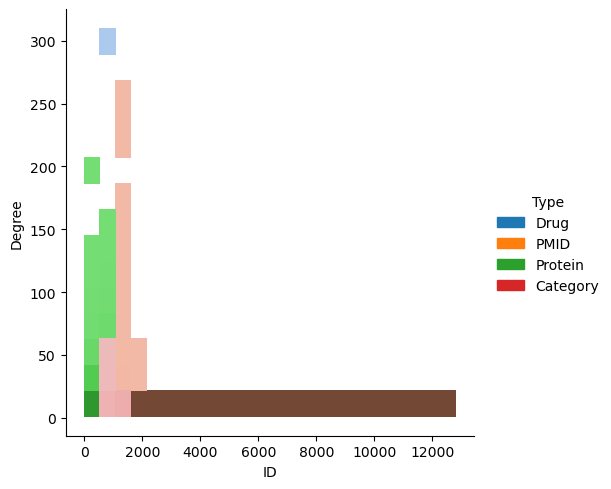

In [101]:
sns.displot(data, x="ID", y="Degree", hue="Type" )
plt.show()